# Taller MIND 01
### Nombre: Edgar Ronaldo Henao Villarreal

Antes de comenzar el taller, iniciaremos con algunas importaciones esenciales para el desarrollo del mismo.

In [1]:
import csv
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

---
1. Cargar el archivo cvs suministrado *titanic.cvs*

In [2]:

def inicio():
    df = pd.read_csv ('titanic.csv')
    return df
inicio()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


---
2. Calcular y mostrar el valor de la media y la mediana de las edades de las personas que viajaban en el
barco y sobrevivieron

In [3]:
def extraerEdades(reader):
    """Media (promedio) de una lista de valores, usando la libreria statistics"""
    ages = reader[reader["Survived"] == 1]["Age"].mean()
    print("La media de la edad de los sobrevivientes es {media:.2f}".format(media = ages))
    ages = reader[reader["Survived"] == 1]["Age"].median()
    print("La mediana de la edad de los sobrevivientes es {mediana:.0f}".format(mediana = ages))
    
def punto2():
    """Solucion del punto solicitado"""
    extraerEdades(inicio())
punto2()

La media de la edad de los sobrevivientes es 28.34
La mediana de la edad de los sobrevivientes es 28


---
3. Mostrar la cantidad de personas que viajaban en el barco en cada una de las tres clases.

In [4]:
def contarPasajeros(reader):
    """Cuenta la cantidad de pasajeros en cada clase, si se le agrega la lista de los que sobrevivieron y los que no, hace
    la respectiva discriminacion"""
    class1 = reader[reader["Pclass"] == 1]["Pclass"].count()
    class2 = reader[reader["Pclass"] == 2]["Pclass"].count()
    class3 = reader[reader["Pclass"] == 3]["Pclass"].count()
    print("El numero de personas que viajaban de clase 1 es",class1)
    print("El numero de personas que viajaban de clase 2 es",class2)
    print("El numero de personas que viajaban de clase 3 es",class3)
def punto3():
    #l1 = sacarColumna(inicio(),2)
    contarPasajeros(inicio())
punto3()

El numero de personas que viajaban de clase 1 es 216
El numero de personas que viajaban de clase 2 es 184
El numero de personas que viajaban de clase 3 es 491


---
4. Mostrar la cantidad de personas que viajaban en el barco en cada una de las tres clases dicriminando
por sobrevivientes y no sobrevivientes.

In [5]:
def contarPasajerosExtend(reader):
    class10 = reader[(reader["Survived"] == 0) & (reader["Pclass"] == 1)]["Pclass"].count()
    class11 = reader[(reader["Survived"] == 1) & (reader["Pclass"] == 1)]["Pclass"].count()
    class20 = reader[(reader["Survived"] == 0) & (reader["Pclass"] == 2)]["Pclass"].count()
    class21 = reader[(reader["Survived"] == 1) & (reader["Pclass"] == 2)]["Pclass"].count()
    class30 = reader[(reader["Survived"] == 0) & (reader["Pclass"] == 3)]["Pclass"].count()
    class31 = reader[(reader["Survived"] == 1) & (reader["Pclass"] == 3)]["Pclass"].count()
    print("El numero de personas que viajaban de clase 1 y sobrevivieron es",class11,"y fallecieron",class10)
    print("El numero de personas que viajaban de clase 2 y sobrevivieron es",class21,"y fallecieron",class20)
    print("El numero de personas que viajaban de clase 3 y sobrevivieron es",class31,"y fallecieron",class30)
  
def punto4():
    contarPasajerosExtend(inicio())
punto4()

El numero de personas que viajaban de clase 1 y sobrevivieron es 136 y fallecieron 80
El numero de personas que viajaban de clase 2 y sobrevivieron es 87 y fallecieron 97
El numero de personas que viajaban de clase 3 y sobrevivieron es 119 y fallecieron 372


---
5. Calcular y mostrar el valor del tiquete más ecónomico, más costoso y el valor promedio.

In [6]:
def punto5(reader):
    minfare = reader["Fare"].min()
    maxfare = reader["Fare"].max()
    media = reader["Fare"].mean()
    print("El valor del tiquete mas economico es ",minfare)
    print("El valor del tiquete mas costoso es",maxfare)
    print("El valor promedio de los tiquetes es",round(media,3))
punto5(inicio())

El valor del tiquete mas economico es  0.0
El valor del tiquete mas costoso es 512.3292
El valor promedio de los tiquetes es 32.204


---
6. Realice un diagrama de barras (barplot) que permita visualizar la cantidad de personas por género

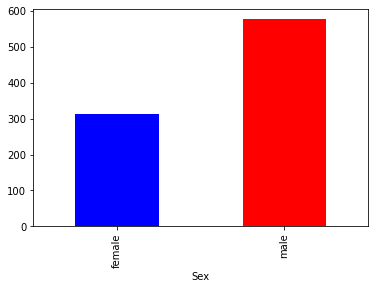

In [7]:
def punto6(reader):
    reader.groupby('Sex')["PassengerId"].count().plot(kind = 'bar',color = ['blue','red'])

punto6(inicio())

---
7. Realice un diagrama de barras (barplot) que permita visualizar la cantidad de personas por tipo de
tiquete.

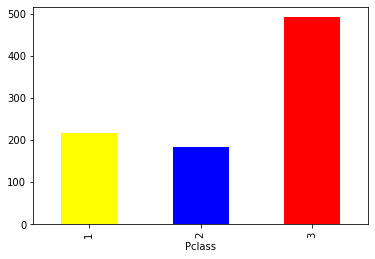

In [8]:
def punto7(reader): 
    reader.groupby('Pclass')["PassengerId"].count().plot(kind = 'bar',color = ["yellow","blue","red"])
punto7(inicio())

---
8. Realice un diagrama de caja (boxplot) con los datos de las edades. ¿Cuál es su interpretación a lo
visualizado en el gráfico?

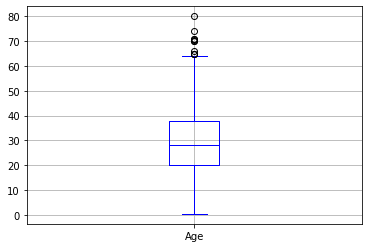

In [9]:
def punto8(reader):
    reader.boxplot(column=['Age'],color = "blue") 
punto8(inicio())

**Interpretacion**

En el grafico de caja y bigotes observamos que la asimetria esta sesgada a la derecha, lo cual se refuerza con los resultados de que la media es mayor a la mediana y vemos un rango menos amplio, lo cual muestra datos mas proximos. Los valores atipicos se muestran mayores a la edad de 65 años y menores a los 75 años. En pocas palabras, el diagrama muestra que la dispersion de las edades es ligera.

---
9. Para cada una de las variables muestre el consolidado de la siguiente información: valor mínimo,
primer cuartil, promedio, tercer cuartil y valor máximo. Recuerde se requiere para cada variable.

Para este punto las variables con las que se puede trabajar son:
* Age
* SibSp
* Parch
* Fare

In [10]:
def punto9Age(reader):
    mini =  reader["Age"].min()
    q1 = reader["Age"].quantile(0.25)
    q3 = reader["Age"].quantile(0.75)
    maxi =  reader["Age"].max()
    print("La edad minima es",mini)
    print("El cuantil 1 es",q1)
    print("El cuantil 3 es",q3)
    print("La edad maxima es",maxi)
punto9Age(inicio())

La edad minima es 0.42
El cuantil 1 es 20.125
El cuantil 3 es 38.0
La edad maxima es 80.0


In [11]:
def punto9SibSp(reader):
    SibSpMin = reader["SibSp"].min()
    q1 = reader["SibSp"].quantile(0.25)
    q3 = reader["SibSp"].quantile(0.75)
    SibSpMax = reader["SibSp"].max()
    print("Numero de relacionados minimo es", SibSpMin)
    print("El primer cuartil es", q1)
    print("El tercer cuartil es", q3)
    print("Numero de relacionados maximo es",SibSpMax)
punto9SibSp(inicio())

Numero de relacionados minimo es 0
El primer cuartil es 0.0
El tercer cuartil es 1.0
Numero de relacionados maximo es 8


In [12]:
def punto9Parch(reader):
    minParch = reader["Parch"].min()
    q1 = reader["Parch"].quantile(0.25)
    q3 = reader["Parch"].quantile(0.75)
    maxParch = reader["Parch"].max()
    print("Numero de padres/hijos minimo es", minParch)
    print("El primer cuartil es", q1)
    print("El tercer cuartil es", q3)
    print("Numero de padres/hijos maximo es",maxParch)
punto9Parch(inicio())

Numero de padres/hijos minimo es 0
El primer cuartil es 0.0
El tercer cuartil es 0.0
Numero de padres/hijos maximo es 6


In [13]:
def punto9Fare(reader):
    minFare = reader["Fare"].min()
    q1 = reader["Fare"].quantile(0.25)
    q3 = reader["Fare"].quantile(0.75)
    maxFare = reader["Fare"].max() 
    print("El valor de tiquete maximo es", maxFare)
    print("El primer cuartil es", q1)
    print("El tercer cuartil es", q3)
    print("El valor de tiquete minimo es",minFare)
punto9Fare(inicio())

El valor de tiquete maximo es 512.3292
El primer cuartil es 7.9104
El tercer cuartil es 31.0
El valor de tiquete minimo es 0.0
